In [1]:
# https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/object_detection/YOLOv3

In [2]:
import torch
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.transforms.functional as FT
from tqdm import tqdm
from torch.utils.data import DataLoader
import numpy as np
import time
import sys
sys.path.append('../')

import config
# from model import YOLOv3
from involution_model import YOLOv3
from dataset import PapsDataset, train_transforms, val_transforms
from train import  train_fn
from scheduler import CosineAnnealingWarmUpRestarts

from utils import (
    mean_average_precision,
    cells_to_bboxes,
    get_evaluation_bboxes,
    save_checkpoint,
    load_checkpoint,
    check_class_accuracy,
    get_loaders,
    plot_couple_examples
)
from loss import YoloLoss

In [3]:
partition = np.load('../data/partition.npy', allow_pickle=True, encoding='latin1').item()
label = np.load('../data/labels_info.npy', allow_pickle=True, encoding='latin1').item()
# partition['train'][0:2]

In [4]:
model = YOLOv3(num_classes=config.NUM_CLASSES).to(config.DEVICE)
optimizer = optim.Adam(
    model.parameters(), lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY
)
loss_fn = YoloLoss()
scaler = torch.cuda.amp.GradScaler()

In [5]:
IMAGE_SIZE = config.IMAGE_SIZE
train_dataset = PapsDataset(
    label,partition['train'],
    transform=train_transforms,
    S=[IMAGE_SIZE // 32, IMAGE_SIZE // 16, IMAGE_SIZE // 8],
    anchors=config.ANCHORS,
)
test_dataset = PapsDataset(
    label,partition['test'],
    transform=val_transforms,
    S=[IMAGE_SIZE // 32, IMAGE_SIZE // 16, IMAGE_SIZE // 8],
    anchors=config.ANCHORS,
)
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=config.BATCH_SIZE,
    num_workers=config.NUM_WORKERS,
#     pin_memory=config.PIN_MEMORY,
    shuffle=True,
    drop_last=False,
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=1,
    num_workers=config.NUM_WORKERS,
#     pin_memory=config.PIN_MEMORY,
    shuffle=True,
    drop_last=False,
)

In [6]:
images, targets = (next(iter(test_dataset)))
print(images.shape)
print(targets[0].shape)
print(targets[1].shape)
print(targets[2].shape)
# for i, j in train_dataset :
#     print(i)

torch.Size([3, 416, 416])
torch.Size([3, 13, 13, 6])
torch.Size([3, 26, 26, 6])
torch.Size([3, 52, 52, 6])


In [7]:
scaled_anchors = (
    torch.tensor(config.ANCHORS)
    * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
).to(config.DEVICE)
scaled_anchors.shape

torch.Size([3, 3, 2])

In [8]:
# saved_dir = '../trained_model/'
# state = torch.load(saved_dir + 'epoch_' + str(90) +'_model.pt')
# epoch = state['epoch']
# model.load_state_dict(state['state_dict'], strict=False)
# optimizer.load_state_dict(state['optimizer'])
# # scheduler.load_state_dict(state['scheduler'])

In [9]:
# model.eval()
# # check_class_accuracy(model, test_loader, threshold=config.CONF_THRESHOLD)
# pred_boxes, true_boxes = get_evaluation_bboxes(
#     test_loader,
#     model,
# #     iou_threshold=config.NMS_IOU_THRESH,
# #     anchors=config.ANCHORS,
# #     threshold=config.CONF_THRESHOLD,
#     iou_threshold=0.4,
#     anchors=config.ANCHORS,
#     threshold=0.5,    
# )
# mapval = mean_average_precision(
#     pred_boxes,
#     true_boxes,
#     iou_threshold=config.MAP_IOU_THRESH,
#     box_format="midpoint",
#     num_classes=config.NUM_CLASSES,
# )
# print(f"MAP: {mapval.item()}")

In [10]:
# x, y = next(iter(test_dataset))
# print((x.shape))
# # print(type(y))
# x, y = iter(test_loader).next()
# print((x.shape))
# # print(type(y))

In [11]:
# import matplotlib.pyplot as plt
# plot_couple_examples(model, test_loader, 0.5, 0.4, scaled_anchors)

In [12]:
# scaled_anchors[2]

In [13]:
# plot_couple_examples(model, test_loader, 0.6, 0.5, scaled_anchors)
# check_class_accuracy(model, test_loader, threshold=config.CONF_THRESHOLD)
# model.eval()
# pred_boxes, true_boxes = get_evaluation_bboxes(
#     test_loader,
#     model,
#     iou_threshold=config.NMS_IOU_THRESH,
#     anchors=config.ANCHORS,
#     threshold=config.CONF_THRESHOLD,
# )

100%|██████████| 3744/3744 [01:28<00:00, 42.28it/s]

Class accuracy is: 100.000000%
No obj accuracy is: 100.000000%
Obj accuracy is: 0.000000%


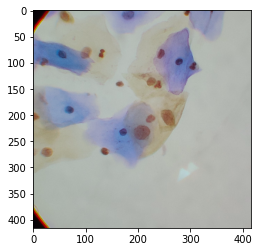

<Figure size 720x720 with 0 Axes>

100%|██████████| 3744/3744 [01:29<00:00, 42.00it/s]

Class accuracy is: 100.000000%
No obj accuracy is: 100.000000%
Obj accuracy is: 0.000000%


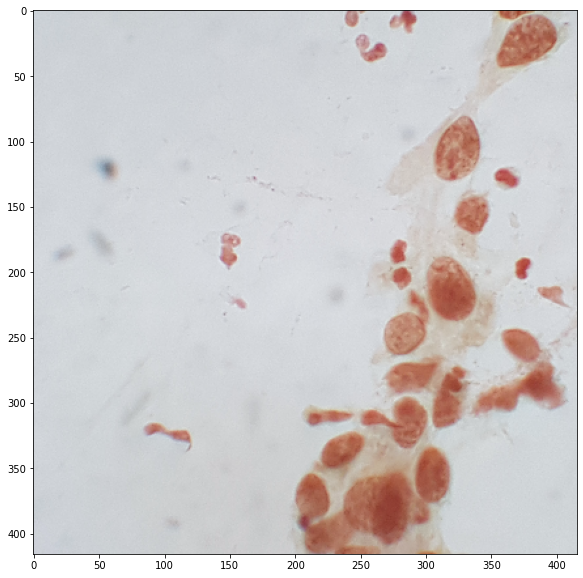

<Figure size 720x720 with 0 Axes>

 88%|████████▊ | 828/936 [06:11<00:48,  2.22it/s, loss=nan]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5277e09830>
Traceback (most recent call last):
  File "/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1297, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/multiprocessing/popen_fork.py", line 45, in wait
    if not wait([self.sentinel], timeout):
  File "/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/multiprocessing/connection.py", line 921, in wait
    ready = selector.select(time

In [14]:
for epoch in range(config.NUM_EPOCHS):
    #plot_couple_examples(model, test_loader, 0.6, 0.5, scaled_anchors)
    model.train()
    train_fn(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors)

    if epoch > 0 and epoch % 5 == 0:
        model.eval()
        check_class_accuracy(model, test_loader, threshold=config.CONF_THRESHOLD)
        plot_couple_examples(model, test_loader, 0.5, 0.4, scaled_anchors)


In [ ]:
# saved_dir = '../trained_model/'
# state = {
#     'epoch': 90,
#     'state_dict': model.state_dict(),
#     'optimizer': optimizer.state_dict(),
# #     'scheduler' : scheduler.state_dict()
# }
# torch.save(state, saved_dir + 'epoch_' + str(90) +'_model.pt')